## Load data

In [1]:
import pandas as pd

original_data = pd.read_excel('dataset/Dep_15_Resultats_com_T1_c.xlsx', header=2)
original_data_canton = pd.read_excel('dataset/Dep_15_Resultats_T1_c.xlsx', header=2, sheet_name="Cantons")
original_data_canton_t2 = pd.read_excel('dataset/Dep_15_Resultats_T2_c.xlsx', sheet_name="Cantons")

df = original_data.copy()
df_canton = original_data_canton.copy()
df_canton_t2 = original_data_canton_t2.copy()


In [2]:
def explodeLines(data, n):
	initdf = data[['Code du département', 'Code du canton', 
			'Code de la commune', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants',
			'% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
			'% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]

	headers = ['N°Panneau', 'Nuance', 'Binôme', 'Voix', '% Voix/Ins', '% Voix/Exp']

	df = pd.DataFrame()
	for i in range(n):
		partidf = data[[h+'.'+str(i) if i!=0 else h for h in headers]]
		partidf = pd.concat([initdf, partidf], axis=1)
		partidf.columns = pd.Index(initdf.columns.values.tolist() + headers)
		df = pd.concat([df, partidf])

	# Remove useless rows
    
	useless_rows = pd.isnull(df[headers]).all(axis=1)
	df = df[~useless_rows]
    
	return df


def getDataFromDepExplode(data, dep):
    dep_raw = data['Code du département'] == dep

    df = data[dep_raw]
    
    # explode line 
    nb_partie = len([header for header in data.columns if "Binôme" in header])
    df = explodeLines(df, nb_partie)
    
    return df

def getDataFromDep(data, dep):
     return data[data['Code du département'] == dep]
    
    

def saveData(data, loc):
    # save cher_data as excel
    writer = pd.ExcelWriter(loc)
    
    # write dataframe to excel
    data.to_excel(writer)

    # save the excel
    writer.save()

In [3]:
#make filter to get data from the cher department
cher_data           = getDataFromDepExplode(df, 18)
cher_data_canton    = getDataFromDep(df_canton, 18)
cher_data_canton_t2 = getDataFromDep(df_canton_t2, 18)





In [4]:
#save data
saveData(cher_data, 'dataset/Dep_2015_cher_com_explode.xlsx')



## data information

In [5]:
cher_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 6435 to 6621
Data columns (total 23 columns):
Code du département    1209 non-null object
Code du canton         1209 non-null int64
Code de la commune     1209 non-null int64
Inscrits               1209 non-null int64
Abstentions            1209 non-null int64
% Abs/Ins              1209 non-null float64
Votants                1209 non-null int64
% Vot/Ins              1209 non-null float64
Blancs                 1209 non-null int64
% Blancs/Ins           1209 non-null float64
% Blancs/Vot           1209 non-null float64
Nuls                   1209 non-null int64
% Nuls/Ins             1209 non-null float64
% Nuls/Vot             1209 non-null float64
Exprimés               1209 non-null int64
% Exp/Ins              1209 non-null float64
% Exp/Vot              1209 non-null float64
N°Panneau              1209 non-null float64
Nuance                 1209 non-null object
Binôme                 1209 non-null object
Voix     

In [6]:
cher_data.head()

,Code du département,Code du canton,Code de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Nuance,Binôme,Voix,% Voix/Ins,% Voix/Exp
6435,18,1,11,1774,828,46.67,946,53.33,15,0.85,...,0.95,922,51.97,97.46,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,64.0,3.61,6.94
6436,18,1,15,4226,1912,45.24,2314,54.76,64,1.51,...,2.03,2203,52.13,95.20,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,277.0,6.55,12.57
6437,18,1,30,944,449,47.56,495,52.44,27,2.86,...,1.01,463,49.05,93.54,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,40.0,4.24,8.64
6438,18,1,37,896,429,47.88,467,52.12,20,2.23,...,1.28,441,49.22,94.43,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,26.0,2.90,5.90
6439,18,1,47,500,206,41.20,294,58.80,17,3.40,...,2.04,271,54.20,92.18,3.0,BC-FG,M. MELLOT Dorian et Mme MILLERIOUX Claire,33.0,6.60,12.18


In [7]:
# affiche les differents parties
cher_data['Nuance'].value_counts(dropna=False)

BC-SOC    291
BC-FN     289
BC-UD     270
BC-FG     152
BC-DVG    139
BC-DVD     25
BC-UDI     13
BC-UMP     13
BC-UC      11
BC-UG       3
BC-DLF      3
Name: Nuance, dtype: int64

In [8]:
cher_data['Code du canton'].value_counts()

8     152
16    144
2     140
9     128
17     96
10     88
12     78
14     72
1      60
11     60
15     60
7      52
19     50
13      9
18      5
5       4
4       4
3       4
6       3
Name: Code du canton, dtype: int64

## data visualisation

In [9]:
'''
# dataframe qui represente le nb de voix par cantons par parties

#df_nbVoix = cher_data.groupby(['Code du canton', 'Nuance']).agg({'Voix':['sum']})
#df_nbVoix.unstack()


df_plot = cher_data.groupby(['Code du canton', 'Nuance'])['Voix'].sum().unstack().reset_index(drop=True).fillna(0)

# ajoute le nombre d'abstentioniste par canton dans le dataframe a plotter
df_nbAbs  = cher_data_canton['Abstentions'].reset_index(drop=True)
#df_plot = pd.concat([df_nbAbs,df_plot ], axis=1)

# ajoute le nombre de vote blanc par canton dans le dataframe a plotter
df_nbBlc  = cher_data_canton['Blancs'].reset_index(drop=True)
#df_plot = pd.concat([df_nbBlc,df_plot ], axis=1)



# on normalise les lignes
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)



df_plot
'''


"\n# dataframe qui represente le nb de voix par cantons par parties\n\n#df_nbVoix = cher_data.groupby(['Code du canton', 'Nuance']).agg({'Voix':['sum']})\n#df_nbVoix.unstack()\n\n\ndf_plot = cher_data.groupby(['Code du canton', 'Nuance'])['Voix'].sum().unstack().reset_index(drop=True).fillna(0)\n\n# ajoute le nombre d'abstentioniste par canton dans le dataframe a plotter\ndf_nbAbs  = cher_data_canton['Abstentions'].reset_index(drop=True)\n#df_plot = pd.concat([df_nbAbs,df_plot ], axis=1)\n\n# ajoute le nombre de vote blanc par canton dans le dataframe a plotter\ndf_nbBlc  = cher_data_canton['Blancs'].reset_index(drop=True)\n#df_plot = pd.concat([df_nbBlc,df_plot ], axis=1)\n\n\n\n# on normalise les lignes\ndf_plot = df_plot.div(df_plot.sum(axis=1), axis=0)\n\n\n\ndf_plot\n"

In [10]:
#df_plot.plot(kind='bar',stacked=True, figsize=(15,10))

Nuance          BC-DLF  BC-DVD  BC-DVG   BC-FG   BC-FN  BC-SOC   BC-UC  \
Code du canton                                                           
1                  0.0     0.0     0.0   709.0  2115.0   744.0     0.0   
2                  0.0     0.0   800.0     0.0  2237.0  2076.0     0.0   
3                  0.0     0.0   796.0     0.0  1198.0  1878.0     0.0   
4                  0.0   625.0     0.0   961.0     0.0  1181.0     0.0   
5                  0.0     0.0     0.0   568.0   812.0  1161.0     0.0   
6                  0.0     0.0   790.0     0.0     0.0  1350.0     0.0   
7                  0.0     0.0     0.0  1390.0  1272.0   730.0     0.0   
8                  0.0     0.0   563.0     0.0  2057.0  1442.0     0.0   
9                  0.0     0.0     0.0   714.0  1923.0   975.0     0.0   
10                 0.0     0.0     0.0   554.0  1538.0  1471.0     0.0   
11                 0.0     0.0  1688.0     0.0  1941.0   802.0     0.0   
12                 0.0   298.0   590.0

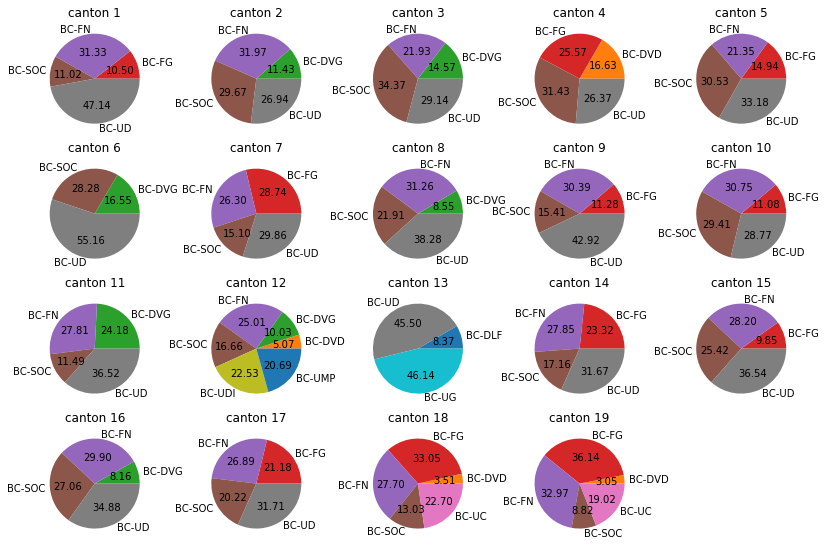

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, sqrt

df_plot = cher_data.groupby(['Code du canton', 'Nuance'])['Voix'].sum().unstack().fillna(0)


print(df_plot)

nb_canton = df_plot.shape[0]
x=ceil(sqrt(nb_canton)) 

# figure size for plot
a = x  # number of rows
b = x  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,12))

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 0 else ''

for i in range(nb_canton):
    plt.subplot(a, b, c)
    plt.title('canton '+str(i+1))
    df_plot.iloc[i].plot.pie(subplots=True,autopct=autopct)
    
    c+=1
    plt.axis('off')

plt.show()


In [12]:
#different candidats 
print(cher_data.groupby(['Nuance','Binôme','Code du canton'])['Binôme'].count().to_string())

Nuance  Binôme                                                    Code du canton
BC-DLF  M. DAUDON Aurélien et Mme PENLOUP Alix                    13                 3
BC-DVD  M. GIRAUDON Jean-Marie et Mme MAUMY Jeanne-Marie          12                13
        Mme BONNEFOY Nathalie et M. MERCIER Philippe              4                  1
        Mme FORTIN Marie-Véronique et M. RUCKA François           19                10
        Mme GODARD-HENRIAU Frédérique et M. MOUSSET Stéphane      18                 1
BC-DVG  M. BARDI Jean-Marc et Mme DABURON Stéphanie               2                 35
        M. BUGNONE Joël et Mme RIVET Michelle                     12                13
        M. DUCAMP Denis et Mme GILBERT Yvette                     6                  1
        M. PIQUET Philippe et Mme ROZIER WEST Danie               16                36
        Mme BESSARD Magali et M. REDOIS Philippe                  3                  1
        Mme GOIX Claudine et M. MORANDI Pascal   

## Preparation des données

In [13]:
import numpy as np

# creation des valeurs cible
etiquette = cher_data_canton_t2[['Binôme', 'Sièges']]

etiquette = etiquette[etiquette.Sièges != " "]

member_elected   = list(etiquette.Binôme)



nb_cher_data_raw = cher_data.shape[0]

y_train = pd.DataFrame(0, index=np.arange(nb_cher_data_raw), columns=['targets'])

for i in range(nb_cher_data_raw):
    if  cher_data.iloc[i]['Binôme'] in member_elected:
        y_train.iloc[i]['targets']=1   
        
from sklearn.preprocessing import LabelEncoder

lblEncoder_nuance = LabelEncoder()
lblEncoder_nuance.fit(cher_data['Nuance'])
cher_data['Nuance'] = lblEncoder_nuance.transform(cher_data['Nuance'])


lblEncoder_binome = LabelEncoder()
lblEncoder_binome.fit(cher_data['Binôme'])
cher_data['Binôme'] = lblEncoder_binome.transform(cher_data['Binôme'])


selected_features = ['Code du département', 'Code du canton', 'Code de la commune',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 
       'Nuance', 'Binôme', 'Voix', '% Voix/Ins', '% Voix/Exp']

X_train = cher_data[selected_features]
    


y_train.targets.value_counts()


0    983
1    226
Name: targets, dtype: int64

## build model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2

knn = KNeighborsClassifier()
knn.fit(X_train, np.ravel(y_train))



KNeighborsClassifier()